In [61]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
import qiskit.quantum_info as qi
%matplotlib inline

/tmp/ipykernel_12666/515181439.py:11: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.toffoli()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.ccx as direct replacement.
  circuit.toffoli(0, 1, 2)


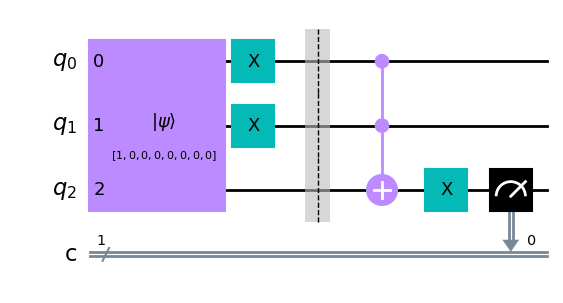

In [75]:
circuit = QuantumCircuit(3, 1)  # circuit with three qubits
# circuit.initialize(1, 0)
# circuit.initialize(1, 1)
circuit.initialize([1, 0, 0, 0, 0,  0 ,0 , 0])
# circuit.initialize([0, 1, 0, 0, 0,  0 ,0 , 0])
# circuit.initialize([0, 0, 1, 0, 0,  0 ,0 , 0])
# circuit.initialize([0, 0, 0, 1, 0,  0 ,0 , 0])
circuit.x(0)
circuit.x(1)
circuit.barrier()
circuit.toffoli(0, 1, 2)
circuit.x(2)
circuit.measure(2, 0)
circuit.draw(output='mpl')

In [78]:
circuit.save_unitary()
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()
print(result.get_unitary(circuit, decimals=3))

Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "unitary" in save instruction.


QiskitError: 'Data for experiment "circuit-269" could not be found.'

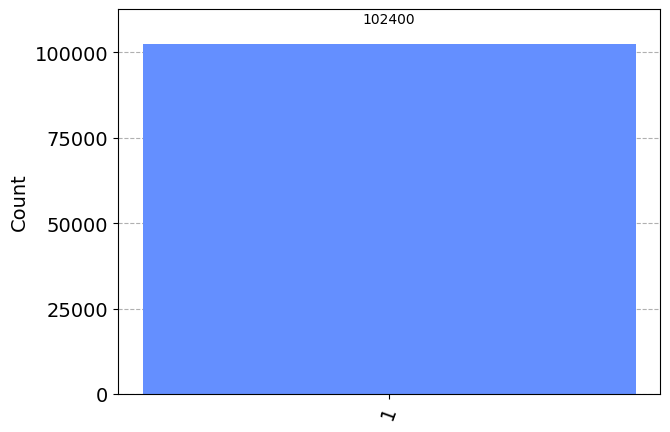

In [73]:


simulator = Aer.get_backend('qasm_simulator')  # create simulator
result = execute(circuit, backend = simulator, shots = 102400).result()  # execute simulator 1024 times
plot_histogram(result.get_counts())  #plot counts of all executions

In [57]:
simulator = Aer.get_backend('statevector_simulator')  # create simulator returning state vector of qubit
result = execute(circuit, backend = simulator).result()  # only single shot needed
statevector = result.get_statevector()
print(statevector)  
# j = imaginary unit (i)  so [1, 0] = |0>
array_to_latex(statevector, prefix="\\text{statevector = }\n")  

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>